In [148]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [150]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-09-19 20:33:40,919][WARNING]: MySQL server has gone away. Reconnecting to the server.


Not all variables are the same length. Cannot create proper DataFrame
result: 9
hits: 9
violations: 9
temperror: 9
hit_rate: 8
error_rate: 8
violation_rate: 8
temp_error_rate: 8
n_lpokes: 8
n_cpokes: 8
n_rpokes: 8
trial_dur: 8
trial_start: 8
valid_early_spoke: 8
first_spoke: 8
first_lpoke: 8
first_rpoke: 8
n_settling_ins: 8
avg_settling_in: 8
cpoke_dur: 8
stage: 8
curriculum: 8
sides: 9
SMA_set: 8
is_match: 9
sa: 8
sb: 8
stimuli_on: 8
settling_in_dur: 8
legal_cbreak_dur: 8
pre_dur: 8
adj_pre_dur: 8
stimulus_dur: 8
delay_dur: 8
post_dur: 8
sb_extra_dur: 8
viol_off_dur: 8
pre_go_dur: 8
inter_trial_dur: 8
go_type: 8
go_dur: 8
give_type_set: 8
give_type_imp: 8
give_frac: 8
give_delay_dur: 8
give_xtra_light_delay_dur: 8
give_use: 9
replay_on: 8
timeouts: 9
water_delivered: 9
give_water_not_drunk: 9
crash_hist: 8
was_block_swtich: 8
volume_multiplier: 8
l_water_vol: 8
r_water_vol: 8
ab_l_prob: 8
ab_r_prob: 8
ab_beta: 8
ab_tau: 8
exp_del_tau: 8
exp_del_min: 8
exp_del_max: 8
session 927302 df 

In [151]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R012_2023-09-19_day_summary
['s_a', 'delay', 'post']


In [152]:
trials_df.query("date == @today").groupby(["animal_id", "date"]).give_type_imp.unique()

animal_id  date      
R010       2023-09-19    [water_and_light]
R011       2023-09-19    [water_and_light]
R012       2023-09-19    [water_and_light]
Name: give_type_imp, dtype: object

In [153]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [154]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-30 -> 2023-09-19
Returning appended df with entries between 2023-08-30 and 2023-09-19
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R012-_days_df.csv


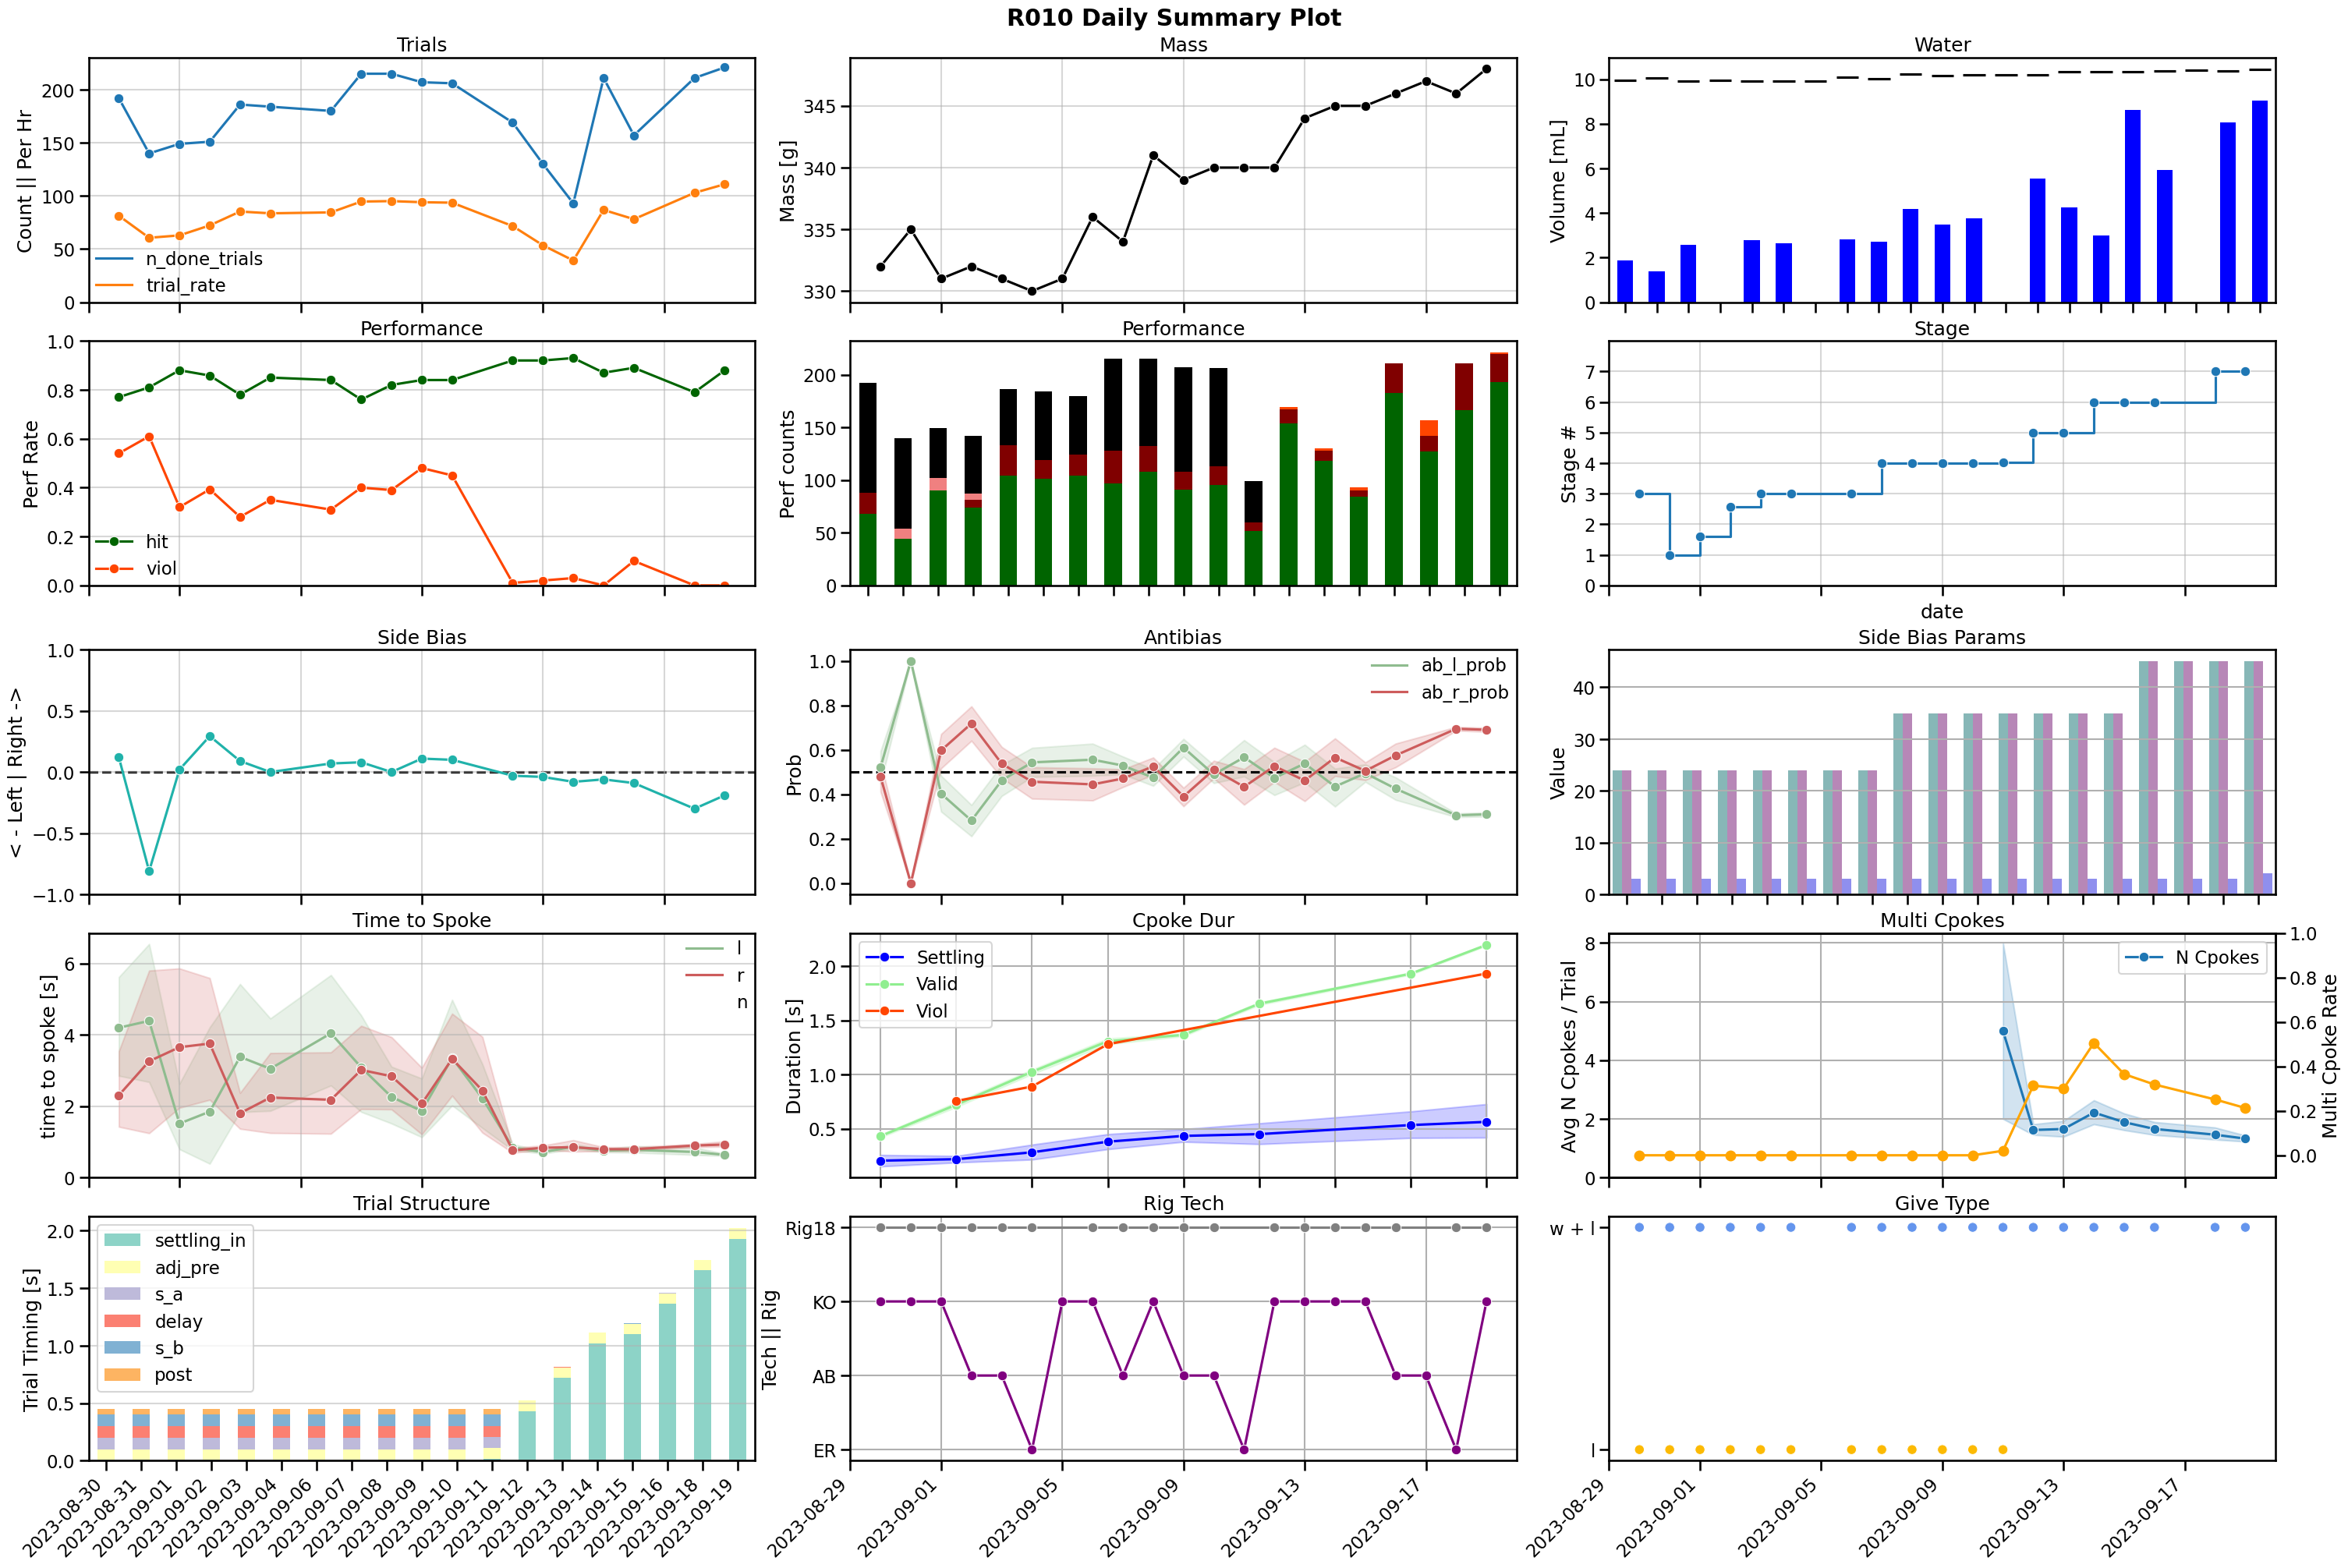

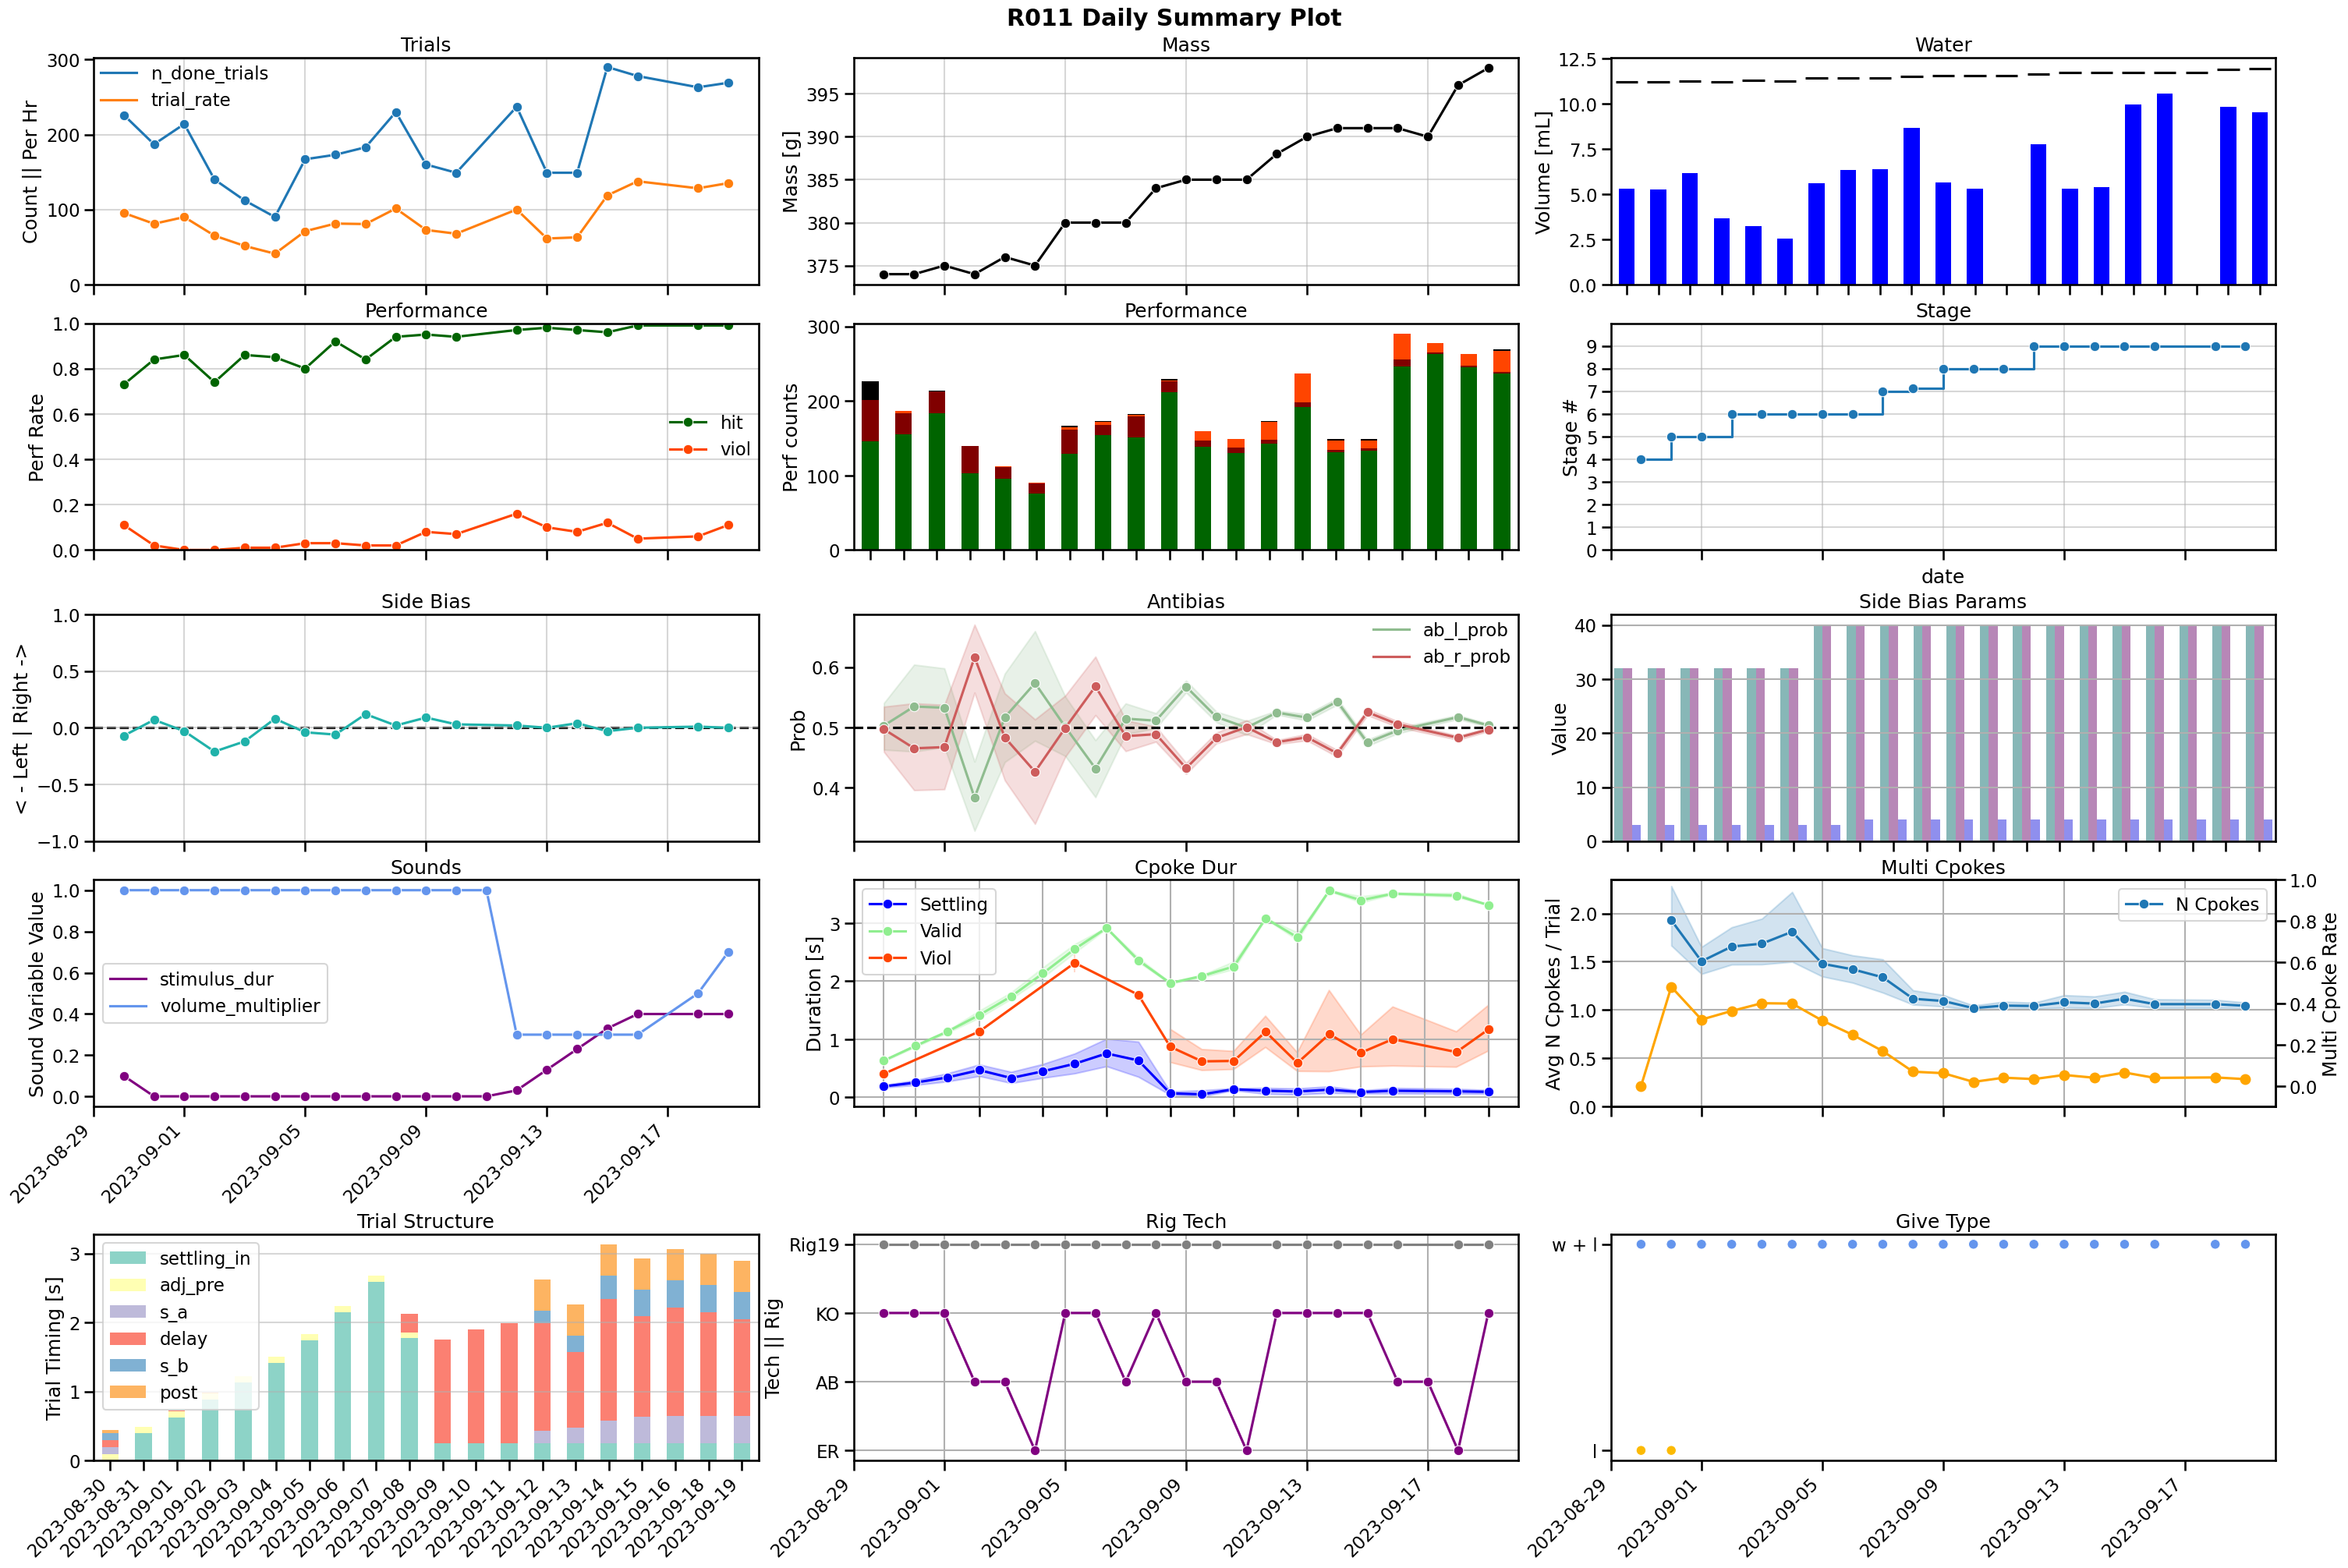

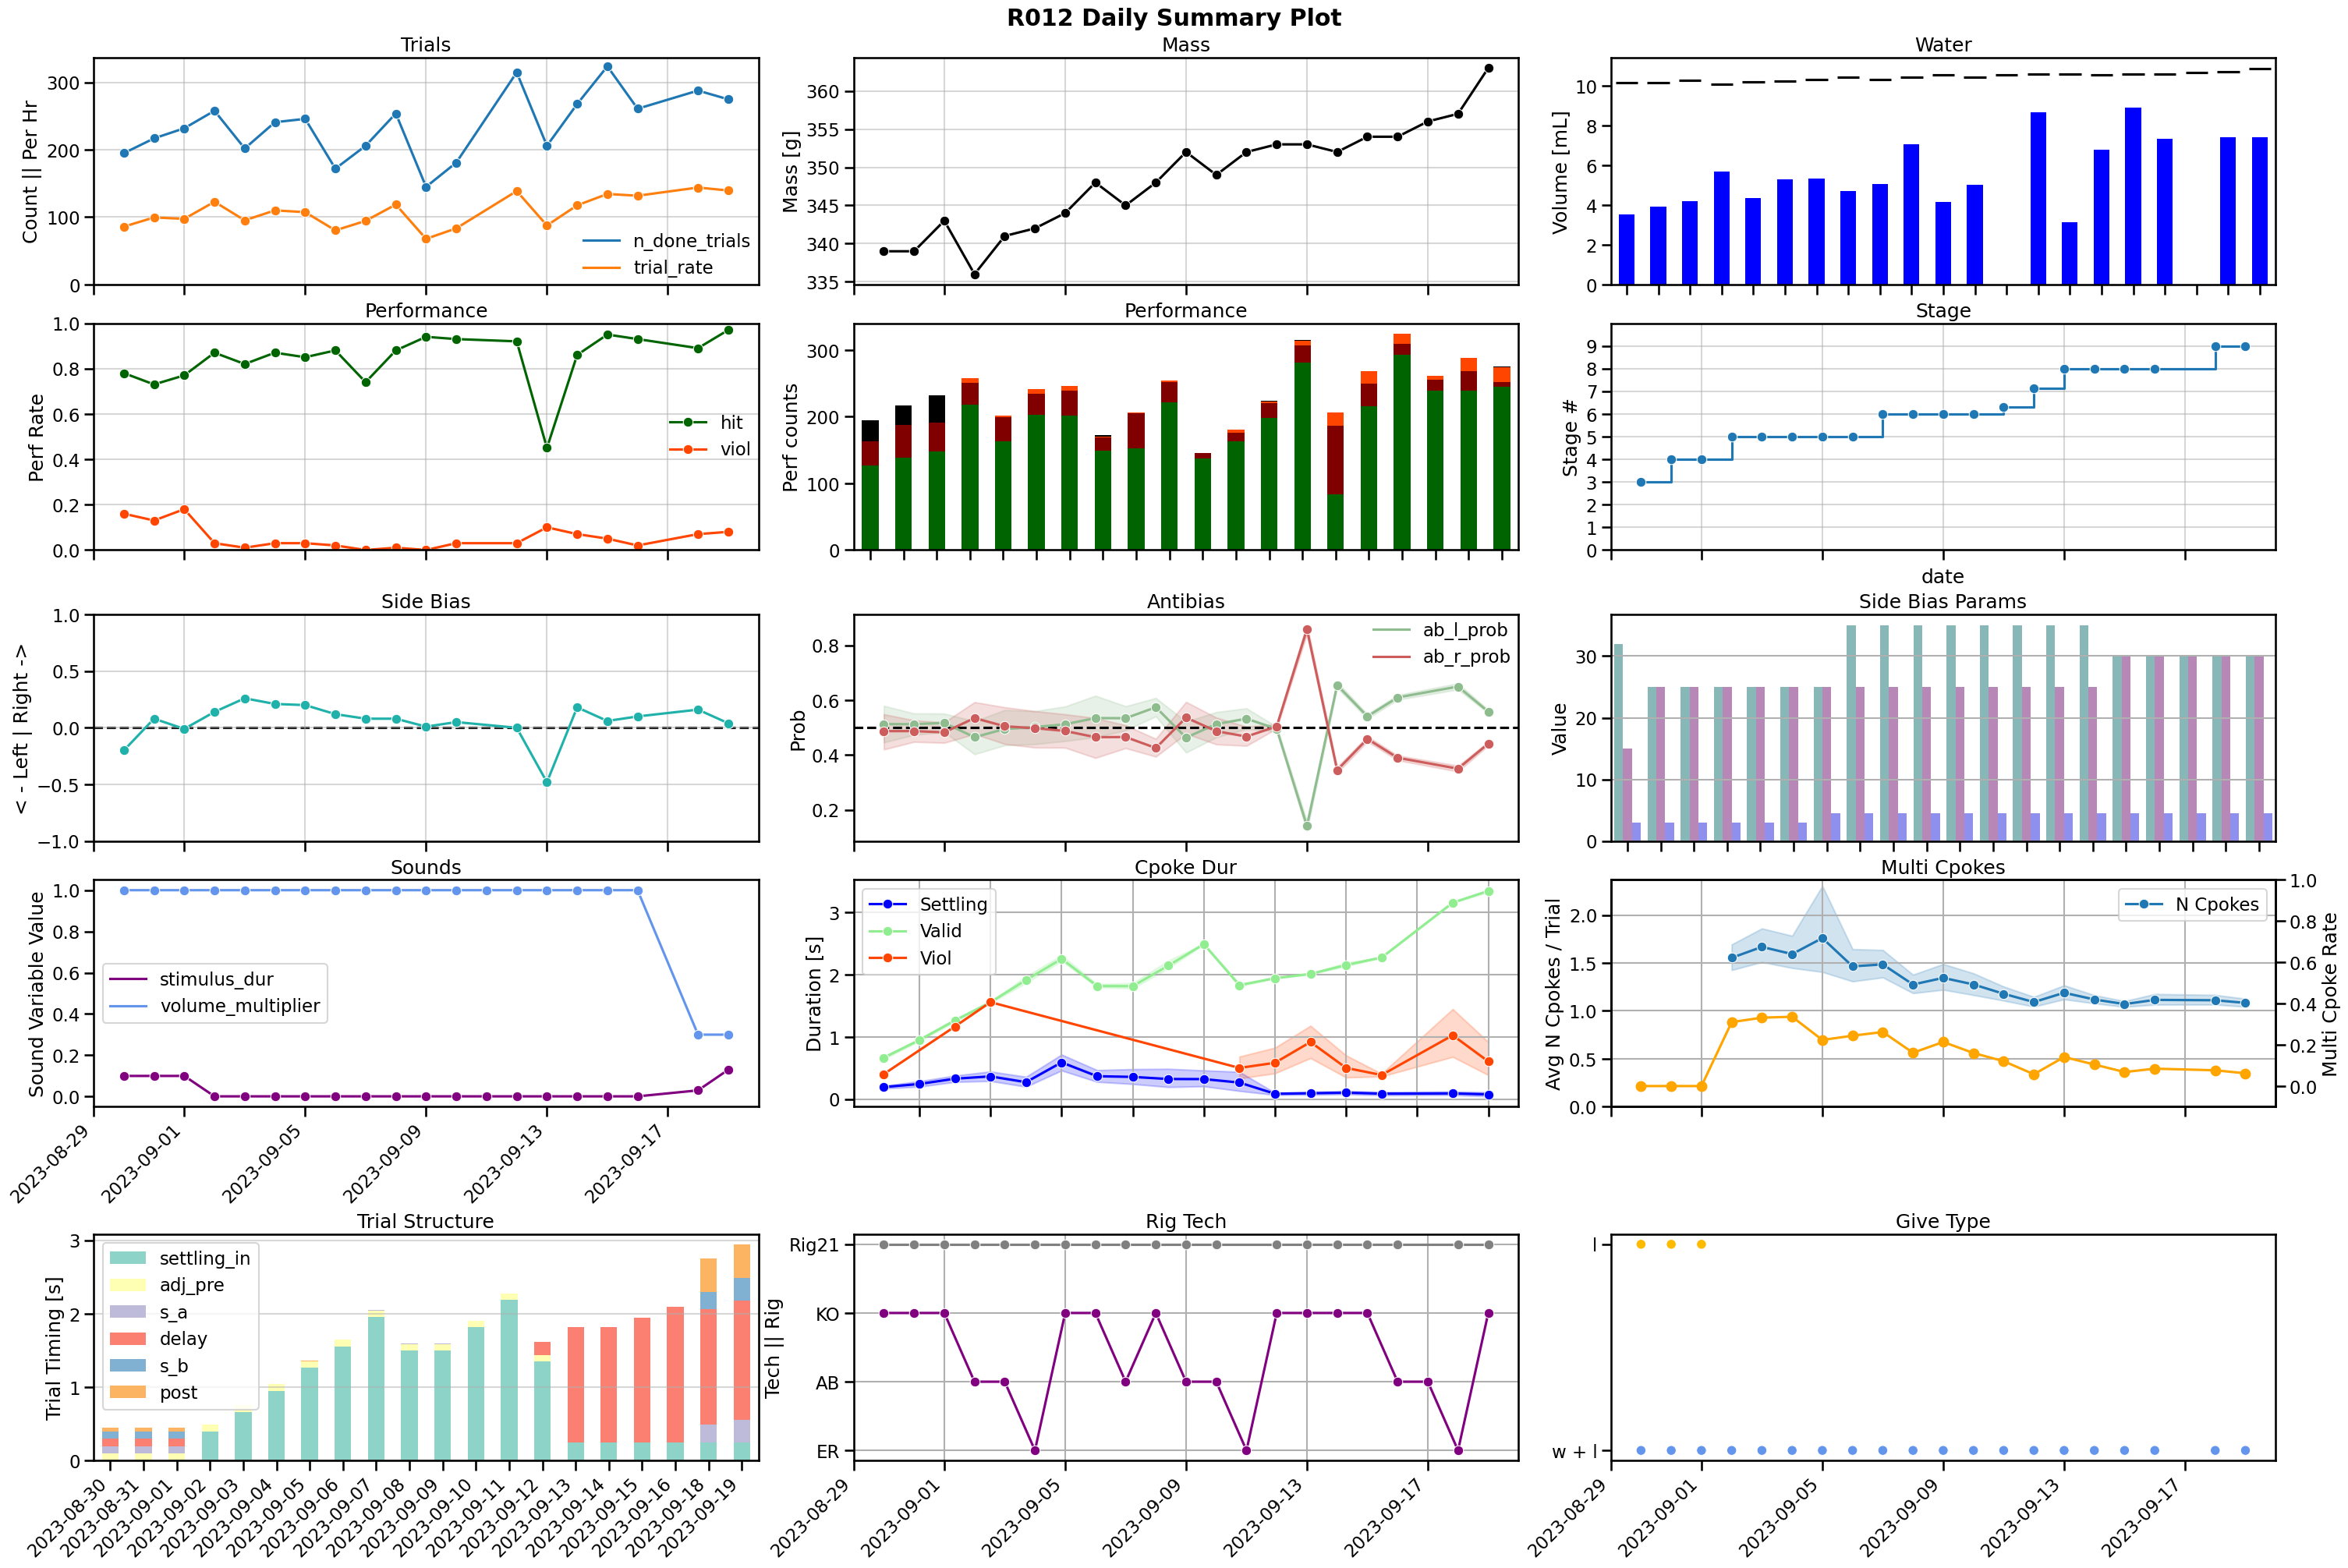

In [155]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)